In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
users = pd.read_csv('users.csv')

In [3]:
train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [5]:
train['grass_date'] = pd.to_datetime(train['grass_date'])

In [6]:
for x in ['last_open_day', 'last_login_day', 'last_checkout_day']:
    print(train[~train[x].str.isnumeric()][x].unique())

['Never open']
['Never login']
['Never checkout']


- last_open_day: 'Never open' → max
- last_login_day: 'Never login' → max
- last_checkout_day: 'Never checkout' → max

In [7]:
for x in ['last_open_day', 'last_login_day', 'last_checkout_day']:
    train[x] = train[x].apply(lambda x: x if x.isnumeric() else -1)
    train[x] = train[x].astype(int)
    max_value = train[x].max()
    train[x] = train[x].apply(lambda x: max_value if x==-1 else x)

In [8]:
train.iloc[1739]

country_code                                           2
grass_date                     2019-07-16 00:00:00+08:00
user_id                                            90499
subject_line_length                                   46
last_open_day                                        808
last_login_day                                     18141
last_checkout_day                                   1445
open_count_last_10_days                                0
open_count_last_30_days                                0
open_count_last_60_days                                2
login_count_last_10_days                               0
login_count_last_30_days                               0
login_count_last_60_days                               0
checkout_count_last_10_days                            0
checkout_count_last_30_days                            0
checkout_count_last_60_days                            0
open_flag                                              0
row_id                         

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   country_code                 73539 non-null  int64                                
 1   grass_date                   73539 non-null  datetime64[ns, pytz.FixedOffset(480)]
 2   user_id                      73539 non-null  int64                                
 3   subject_line_length          73539 non-null  int64                                
 4   last_open_day                73539 non-null  int64                                
 5   last_login_day               73539 non-null  int64                                
 6   last_checkout_day            73539 non-null  int64                                
 7   open_count_last_10_days      73539 non-null  int64                                
 8   open_c

In [10]:
users

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [13]:
users['attr_1'] = users['attr_1'].fillna(0)
users['attr_2'] = users['attr_2'].fillna(0)

For now, don't use `age`

In [14]:
new_train = pd.merge(train, users, left_on='user_id', right_on='user_id', how='inner')

In [15]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   country_code                 73539 non-null  int64                                
 1   grass_date                   73539 non-null  datetime64[ns, pytz.FixedOffset(480)]
 2   user_id                      73539 non-null  int64                                
 3   subject_line_length          73539 non-null  int64                                
 4   last_open_day                73539 non-null  int64                                
 5   last_login_day               73539 non-null  int64                                
 6   last_checkout_day            73539 non-null  int64                                
 7   open_count_last_10_days      73539 non-null  int64                                
 8   open_c

In [16]:
new_train['day_of_week'] = new_train['grass_date'].dt.dayofweek
new_train.sample(5).loc[:, ['grass_date', 'day_of_week']]

,grass_date,day_of_week
63830,2019-08-28 00:00:00+08:00,2
71458,2019-09-02 00:00:00+08:00,0
18090,2019-07-28 00:00:00+08:00,6
19445,2019-07-29 00:00:00+08:00,0
22091,2019-07-30 00:00:00+08:00,1


In [17]:
def target_encoder(feature, label):
    ranking = new_train.groupby(feature).apply(lambda df: df[label].sum() / df[label].count())
    ranking = ranking.sort_values()

    encoder = {x: i for i, x in enumerate(ranking.index)}
    decoder = {i: x for i, x in enumerate(ranking.index)}
    return encoder, decoder

target_encoder('domain', 'open_flag')

({'@gmail.com': 0,
  '@ymail.com': 1,
  '@yahoo.com': 2,
  '@163.com': 3,
  '@rocketmail.com': 4,
  '@outlook.com': 5,
  '@qq.com': 6,
  '@live.com': 7,
  '@hotmail.com': 8,
  '@icloud.com': 9,
  'other': 10},
 {0: '@gmail.com',
  1: '@ymail.com',
  2: '@yahoo.com',
  3: '@163.com',
  4: '@rocketmail.com',
  5: '@outlook.com',
  6: '@qq.com',
  7: '@live.com',
  8: '@hotmail.com',
  9: '@icloud.com',
  10: 'other'})

In [18]:
all_encoders = {}
all_decoders = {}

for x in ['country_code', 'domain', 'day_of_week']:
    encoder, decoder = target_encoder(x, 'open_flag')
    all_encoders[x] = encoder
    all_decoders[x] = decoder

    new_train[x + '_encoded'] = new_train[x].map(encoder)

print(all_encoders)
print(all_decoders)

{'country_code': {1: 0, 3: 1, 2: 2, 5: 3, 6: 4, 7: 5, 4: 6}, 'domain': {'@gmail.com': 0, '@ymail.com': 1, '@yahoo.com': 2, '@163.com': 3, '@rocketmail.com': 4, '@outlook.com': 5, '@qq.com': 6, '@live.com': 7, '@hotmail.com': 8, '@icloud.com': 9, 'other': 10}, 'day_of_week': {5: 0, 1: 1, 0: 2, 3: 3, 6: 4, 4: 5, 2: 6}}
{'country_code': {0: 1, 1: 3, 2: 2, 3: 5, 4: 6, 5: 7, 6: 4}, 'domain': {0: '@gmail.com', 1: '@ymail.com', 2: '@yahoo.com', 3: '@163.com', 4: '@rocketmail.com', 5: '@outlook.com', 6: '@qq.com', 7: '@live.com', 8: '@hotmail.com', 9: '@icloud.com', 10: 'other'}, 'day_of_week': {0: 5, 1: 1, 2: 0, 3: 3, 4: 6, 5: 4, 6: 2}}


In [19]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   country_code                 73539 non-null  int64                                
 1   grass_date                   73539 non-null  datetime64[ns, pytz.FixedOffset(480)]
 2   user_id                      73539 non-null  int64                                
 3   subject_line_length          73539 non-null  int64                                
 4   last_open_day                73539 non-null  int64                                
 5   last_login_day               73539 non-null  int64                                
 6   last_checkout_day            73539 non-null  int64                                
 7   open_count_last_10_days      73539 non-null  int64                                
 8   open_c

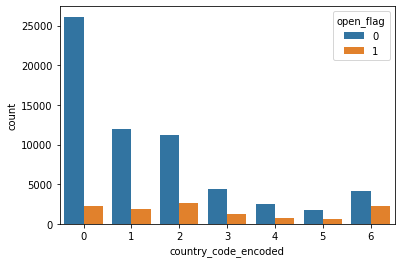

In [20]:
sns.countplot(x='country_code_encoded', hue='open_flag', data=new_train)

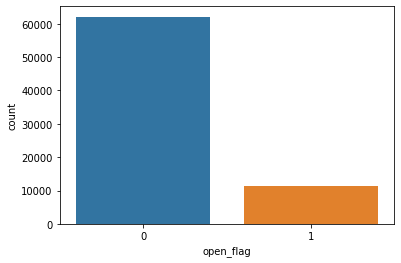

In [21]:
sns.countplot(x='open_flag', data=new_train)

In [22]:
new_train.columns

Index(['country_code', 'grass_date', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag', 'row_id', 'attr_1',
       'attr_2', 'attr_3', 'age', 'domain', 'day_of_week',
       'country_code_encoded', 'domain_encoded', 'day_of_week_encoded'],
      dtype='object')

In [23]:
features = [
    'subject_line_length',
    'last_open_day','last_login_day', 'last_checkout_day',
    'open_count_last_10_days', 'open_count_last_30_days',
    'open_count_last_60_days', 'login_count_last_10_days',
    'login_count_last_30_days', 'login_count_last_60_days',
    'checkout_count_last_10_days', 'checkout_count_last_30_days',
    'checkout_count_last_60_days', 
    'attr_1', 'attr_2', 'attr_3',
    'country_code_encoded', 'domain_encoded', 'day_of_week_encoded'
]

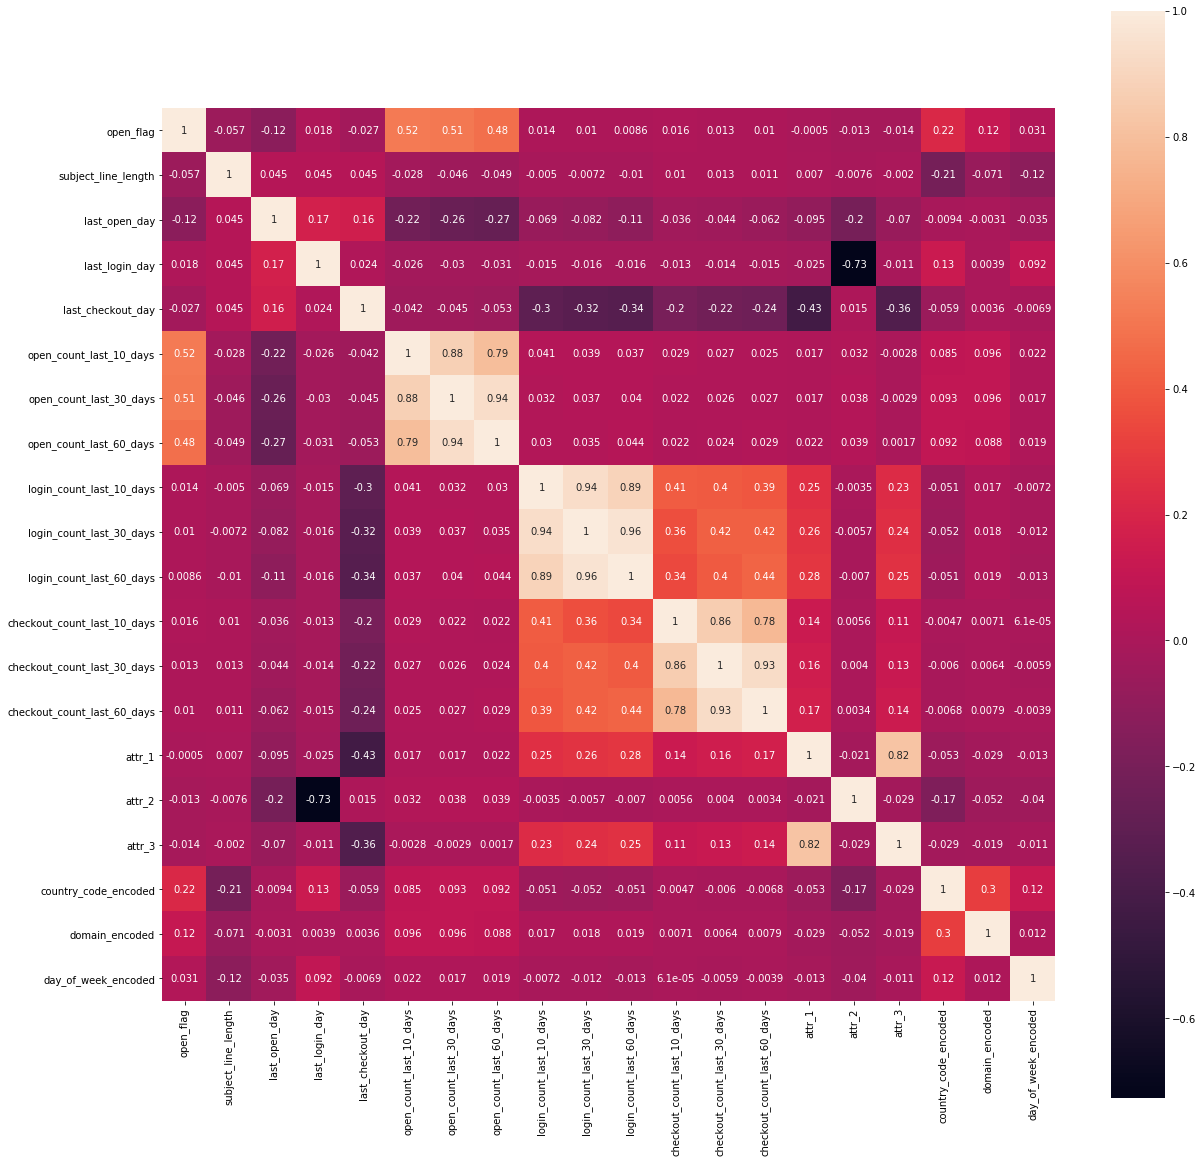

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(
    new_train.loc[:, ['open_flag'] + features].corr(), 
    square=True, annot=True
)

In [25]:
cont_features = [
    'subject_line_length',
    'last_open_day','last_login_day', 'last_checkout_day',
    'open_count_last_10_days', 'open_count_last_30_days',
    'open_count_last_60_days', 'login_count_last_10_days',
    'login_count_last_30_days', 'login_count_last_60_days',
    'checkout_count_last_10_days', 'checkout_count_last_30_days',
    'checkout_count_last_60_days',
]
cat_features = [
    'attr_1', 'attr_2', 'attr_3',
    'country_code_encoded', 'domain_encoded', 'day_of_week_encoded'
]

print('Number of continuous features: ', len(cont_features))
print('Number of categorical features: ', len(cat_features))

Number of continuous features:  13
Number of categorical features:  6


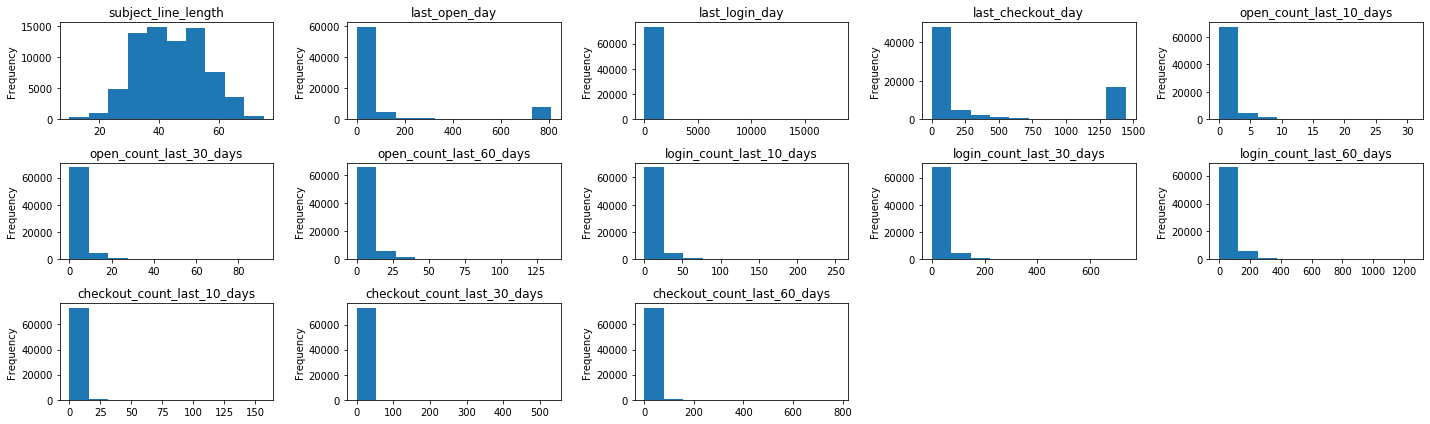

In [26]:
plt.figure(figsize=(20,6))
for i, x in enumerate(cont_features):
    plt.subplot(3, 5, i+1)
    new_train[x].plot.hist()
    plt.title(x)

plt.tight_layout()

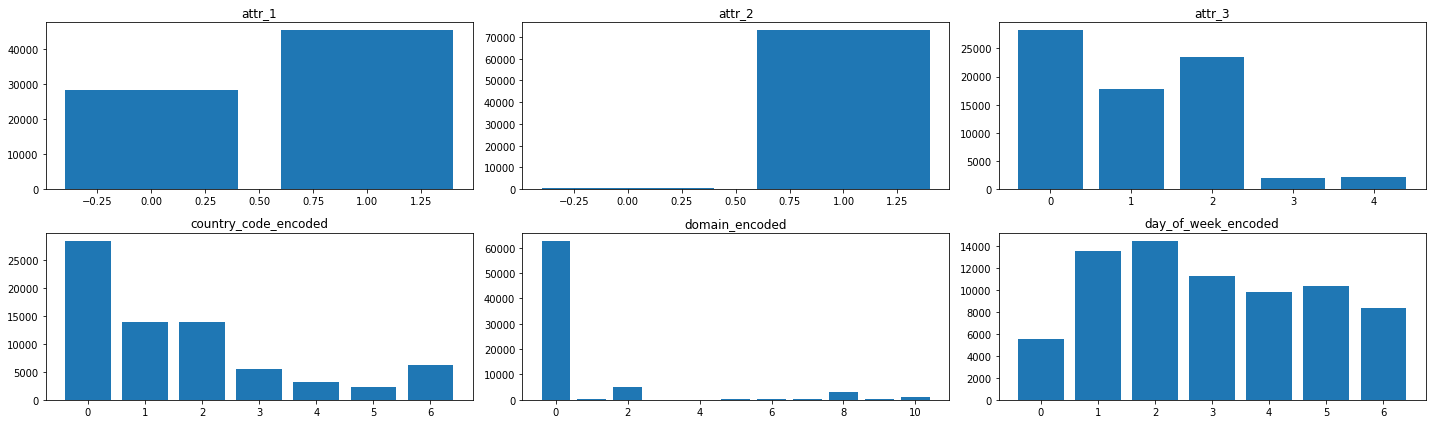

In [36]:
plt.figure(figsize=(20,6))
for i, x in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    count = new_train.groupby(x).count()['open_flag']
    plt.bar(count.index, count)
    plt.title(x)

plt.tight_layout()

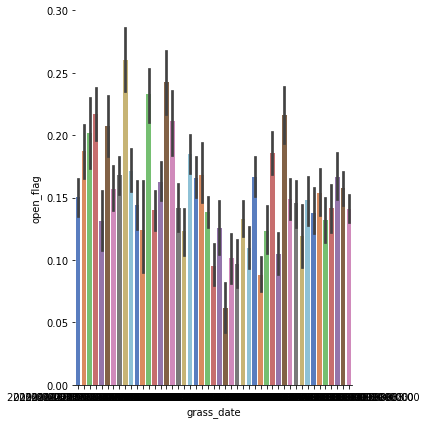

In [12]:
g = sns.catplot(
    x="grass_date", 
    y="open_flag", 
    # hue="sex", 
    data=train,
    height=6, kind="bar", palette="muted")
g.despine(left=True)

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

In [46]:
inputs = new_train.loc[:, features]
labels = new_train['open_flag']

In [47]:
scale = StandardScaler()
inputs = scale.fit_transform(inputs)

inputs

array([[ 0.03062836, -0.38655148, -0.09960797, ...,  2.32656985,
        -0.34191718, -1.07557913],
       [ 0.03062836, -0.42811265, -0.10132596, ...,  2.32656985,
         3.31735739, -1.07557913],
       [ 0.47629107, -0.40733207, -0.10046696, ...,  1.25939243,
         0.57290146, -1.07557913],
       ...,
       [-1.03896213,  2.89262475, 15.47828598, ...,  0.192215  ,
        -0.34191718, -0.52785001],
       [-0.50416688, -0.44473712, -0.07555608, ...,  0.192215  ,
        -0.34191718, -0.52785001],
       [-0.41503434, -0.46136158, -0.10218495, ...,  1.25939243,
        -0.34191718, -0.52785001]])

In [48]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.10, random_state=0)

In [67]:
forest = RandomForestClassifier()
forest.fit(inputs_train, labels_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
preds = forest.predict(inputs_test)

Accuracy:  0.8901278215936905


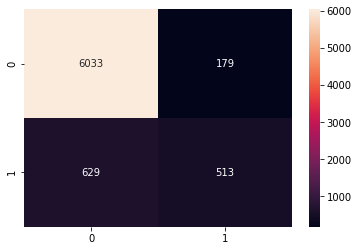

In [69]:
sns.heatmap(confusion_matrix(labels_test, preds), annot=True, fmt="d")
print('Accuracy: ', accuracy_score(labels_test, preds))

<BarContainer object of 19 artists>

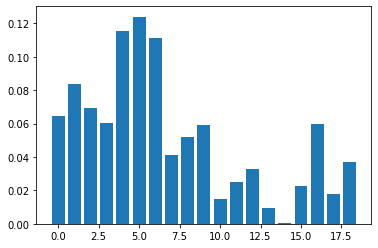

In [70]:
feature_weights = forest.feature_importances_
plt.bar(range(len(feature_weights)), feature_weights)

In [74]:
svm = SVC(kernel='rbf')
svm.fit(inputs_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
preds = svm.predict(inputs_test)

Accuracy:  0.885504487353821


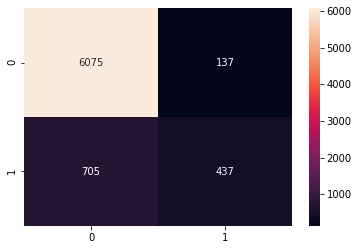

In [77]:
sns.heatmap(confusion_matrix(labels_test, preds), annot=True, fmt="d")
print('Accuracy: ', accuracy_score(labels_test, preds))